<a href="https://colab.research.google.com/github/SushmaRajagopal/Freshness-Grading-of-Tomato-using-Fast-RCNN/blob/main/tomato_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/skarifahmed/FGrade.git

Cloning into 'FGrade'...
remote: Enumerating objects: 6429, done.
remote: Total 6429 (delta 0), reused 0 (delta 0), pack-reused 6429
Receiving objects: 100% (6429/6429), 111.25 MiB | 25.71 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (6405/6405), done.


In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from PIL import Image
from IPython.display import display
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Data Preparation
def read_images_and_labels(data_dir):
    images = []
    labels = []
    for label in range(10):
        label_dir = os.path.join(data_dir, str(label))
        for filename in os.listdir(label_dir):
            img_path = os.path.join(label_dir, filename)
            img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Model Creation
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
# Data Loading
training_data_dir = "/content/FGrade/data/Training_set"
testing_data_dir = "/content/FGrade/data/Testing_set"

x_train, y_train = read_images_and_labels(training_data_dir)
x_test, y_test = read_images_and_labels(testing_data_dir)

# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

def myModel(imageDimensions, noOfClasses):
    input_shape = (imageDimensions[0], imageDimensions[1], 3)  # Assuming RGB images
    inputs = Input(shape=input_shape)

    # Convolutional layer 1
    x = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional layer 2
    x = Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Convolutional layer 3
    x = Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten layer
    x = Flatten()(x)

    # Fully Connected layers
    x = Dense(512, activation='relu')(x)
    x = Dense(512, activation='relu')(x)

    # Output layer
    outputs = Dense(noOfClasses, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    # Define the learning rate scheduler
    initial_learning_rate = 0.001
    decay_steps = 10000  # Set a reasonable decay step value
    decay_rate = 0.96
    learning_rate_scheduler = ExponentialDecay(initial_learning_rate, decay_steps, decay_rate)

    # Compile the model with the learning rate scheduler
    model.compile(optimizer=Adam(learning_rate=learning_rate_scheduler), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming you have defined the variables: imageDimensions, noOfClasses
model = myModel(imageDimensions, noOfClasses)
print(model.summary())

# Assuming you have defined the variables: X_train, y_train, X_validation, y_validation, X_test, y_test
batch_size_val = 128
epochs_val = 30

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=batch_size_val,
                    epochs=epochs_val,
                    validation_data=(X_validation, y_validation),
                    shuffle=True)

plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

# STORE THE MODEL
save_model(model, 'model.h5')


In [ ]:
# Model Training
model = create_model()

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

model.fit(train_generator, epochs=2, validation_data=test_generator)


In [ ]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc}')

40/40 [==============================] - 33s 822ms/step - loss: 1.6583 - accuracy: 0.4635
Test Accuracy: 0.46352940797805786


In [ ]:
# model_loader.py

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model

def load_trained_model(model_path):
    model = load_model(model_path)
    return model

model_path = "/content/drive/MyDrive/Colab Notebooks/model.h5"

# Save the model to the specified path
save_model(model, model_path)


<ipython-input-14-de82a8c5b480>:14: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, model_path)


In [ ]:
model_path = "/content/drive/MyDrive/Colab Notebooks/model.h5"
model = load_model(model_path)


In [ ]:
# Inference
def predict_freshness(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Create batch dimension
    prediction = model.predict(img_array)
    freshness_grade = np.argmax(prediction)
    return freshness_grade



In [ ]:
# Example of using the predict_freshness function
image_path = "/content/FGrade/data/Testing_set/0/003.jpg"
freshness_grade = predict_freshness(image_path)
print(f"Freshness Grade: {freshness_grade}")

1/1 [==============================] - 0s 140ms/step
Freshness Grade: 0


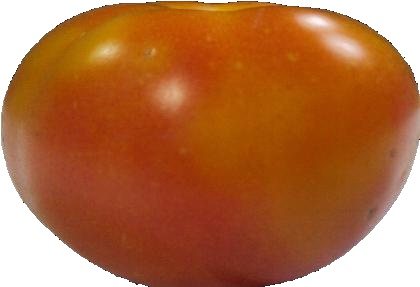

Good quality, you can eat it.


In [ ]:
# Display the image
image = Image.open(image_path)
display(image)

# Define messages based on freshness grade
if freshness_grade <= 3:
    message = "Good quality, you can eat it."
elif freshness_grade <= 6:
    message = "Eat it soon, It cannot be stored"
else:
    message = "Don't eat it. It's rotten.!!!"

print(message)